# Project
***
## Cian Hogan
## GMIT Data Analytics 2020
## Programming for Data Analysis Module

## Project Problem Statement
***
*Create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.*

# Irish Residential Property Data

<img src="https://d2t1xqejof9utc.cloudfront.net/screenshots/pics/02b07141350951613c40c52512801d14/large.JPG">  

# Project Proposition
***
The goal of this project is to simulate Irish house prices over the next 5 years. The four variables that we are going to look at are **Date of Sale**, **Location/County**, **House Size/Meters Squared** and **House Price**. 

Historical data for house sales in Ireland is available in The [Residential Price Property Register](https://propertypriceregister.ie/). Here we can get accurate information on dates, addresses and prices of house sales in Ireland since 1st January 2010 [1].

It is not as easy to come across accurate records for house sales by size in Ireland. We can however estimate this based on a number of factors. We can base our simulation on the average house size in Ireland, 81m<sup>2</sup> [2]. Data is more [widely available](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/725085/Floor_Space_in_English_Homes_main_report.pdf) on house size in the UK so we shall assume that Irish housing would be of similar size and use that information to guide our predictions [3].

|Date|Location|Sqr Meters|Price (€)|
|-----|-----|-----|-----|
|    |     |      |     | 

 # 1. Exploring historical data
 ***
We can use historical Irish house price data to inform our simulation. Despite being the best form of data available in this area the price property register does have some limitations. 

|Date of Sale (dd/mm/yyyy)|Address|Postal Code|County|Price (€)|Not Full Market Price|VAT Exclusive|Description of Property|Property Size Description|
|----|----|----|----|----|-----|-----|-----|------|
|    |    |    |    |    |     |     |     |      |

*Price Property Register Fields*

The register has detailed information on Date of Sale, Address of property and price information. The register also has fields for **Not Full Market Price, VAT Exclusive, Description of Property and Property Size Description** but these are either incomplete or not well formatted for analysis.

The description of property field would be very useful had it contained reliable information of the type of property, such as number of bedrooms and whether the property was a house or apartment, detached or terrace ect. Instead it just contains the entries **New Dwelling house /Apartment** or **Second-Hand Dwelling house /Apartment**.

Similarly the property size description field contains mostly empty fields with the odd entry like **greater than or equal to 38 sq metres and less than 125 sq metres** or **greater than 125 sq metres**. 

More detailed records in both of these areas would allow for more accurate analysis of the properties sold in Ireland by type and size. Instead we have to base our estimates off of more detailed data collected in the UK about property size and type which can lead to inaccuracies [3].

For this analysis we are going to focus on the **County** field as our source for location data and ignore the **Address** and **Postal Code** fields. The address field contains specific addresses which can be used in more detailed analysis on specific locations such as towns and electoral areas but that is outside the scope of this project [4]. The postal code field does not contain accurate details for the entire country and instead contains postal code for Dublin City districts. This could be useful for separating Dublin City from the rest of the country as the city itself would have a much larger population than most counties in Ireland [5]. In the future, integrating accurate EirCode information to the Property Register may allow for better location specific analysis.

## 1A. Analysis
Before we do any analysis we need to first import the external libraries we will use throughout the notebook. Here we import `pandas as pd` for importing the csv data into a pandas DataFrame object and performing analysis using pandas built in tools [6]. We import `numpy as np` for it's powerful array computation abilities, pseudo-random generation and other scientific computing functions and methods [7]. Finally we import the plotting library `matplotlib's module pyplot as plt`. This package is used to create customisable visualisations of the data [8].

Next we use a couple of pyplot methods to customise the plots we are going to generate later in the notebook. These only alter the style of the plots and do not alter the functionality of the plots themselves. `plt.style.use()` allows us to select from a group of style sheets that control the aesthetics of the plots, in this case we use the **seaborn** style but many others are available. `rcParams` allows us to alter other visual attributes and here we use it to increase the size of the plots to 15x8. Some of the plots contain a lot of information and therefore a larger plot allows use to see it in more detail [9].

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [15, 8]

Next, we can import our data in the form of a csv file that is saved in the same directory as the notebook. We use the pandas method `read_csv` and pass it the file *PPR-ALL.csv* [10]. This loads the data from the csv file into the form of a Pandas DataFrame object in the variable *data*. As mentioned above not all fields of the price property register are of interest to us for our analysis. We pass the names of the columns we want to the parameter *usecols* in the form of a list.

We check size and shape of the data using the shape method which shows that the data currently has 450367 rows and 3 columns.

In [2]:
data = pd.read_csv("PPR-ALL.csv", usecols=["Date of Sale (dd/mm/yyyy)", "County", "Price (€)"])
print(data.shape)

(450367, 3)


We can use the DataFrame method **head()** to display the first 5 rows of the data. Here we see the 3 column names *Date of Sale (dd/mm/yyyy), County and Price (€)* as well as the first 4 entries and the index column of the far left.

We can see that the Price column contains formatting with a **€** symbol and commas. This may cause some issues when we are performing any calculations so we must clean the data to a strictly numerical value.

Below we use **string slicing and type formatting** to convert the price value to a float.

In [3]:
print(data.head())

  Date of Sale (dd/mm/yyyy)    County     Price (€)
0                  1/1/2010    Dublin  € 343,000.00
1                  3/1/2010     Laois  € 185,000.00
2                  4/1/2010    Dublin  € 438,500.00
3                  4/1/2010     Meath  € 400,000.00
4                  4/1/2010  Kilkenny  € 160,000.00


In [4]:
# convert string to float, removing € symbol and commas
data["Price (€)"] = data.loc[:,"Price (€)"].str.slice(1,).str.replace(",", "").astype(float)

We can check the data again using head() to make sure the price data has been updated to numerical values. 

We also look at the min and max values of the *Price (€)* column to give us a look at the make-up of the data.

In [5]:
print(data.head())
print("min: ", data["Price (€)"].min())
print("max: ", data["Price (€)"].max())

  Date of Sale (dd/mm/yyyy)    County  Price (€)
0                  1/1/2010    Dublin   343000.0
1                  3/1/2010     Laois   185000.0
2                  4/1/2010    Dublin   438500.0
3                  4/1/2010     Meath   400000.0
4                  4/1/2010  Kilkenny   160000.0
min:  5030.53
max:  142256576.05


Below we calculate some general statistics about the price column using the pandas methods `mean()`, `Median()` and `std()` to calculate the mean, median and standard deviation of the dataset.

We can see from the table below the mean value is significantly higher than the median value. We can also see that the standard deviation is extremely high for the size of the mean. This is due to some extremely high and low outliers which don't accurately reflect true averages in the population.

This is why in general we look at median values for house prices as it controls for these extreme outliers and gives a more accurate overview of the average house price in an area over a given period of time [11].

|Mean|Median|Standard Deviation|
|:--:|:----:|:----------------:|
|€255,374|€193,000|804626|


In [6]:
print("Mean: ", round(data["Price (€)"].mean()))
print("Median: ", round(data["Price (€)"].median()))
print("Standard Deviation: ", round(data["Price (€)"].std()))

Mean:  255374
Median:  193000
Standard Deviation:  804626


## 1B. Price by County
***
The next key variable we are interested after price is **location** of sale. We have in the data each county where each sale occurred. When we generate our simulated data we want the results to mirror the makeup of this data. We do not want to just make each county equally likely to have a sale because we know from experience that not each county would have house sales at the same rate as others. For example, we would expect the county of Dublin to have significantly more sales than any other county because of the population and demand in Dublin would be much higher than any other county.

We want to be able to see what percentage of houses are sold in each county and what the average price is in each county.

### 1b 1. Percentage of houses sold by county

We want to calculate the percentage of houses sold per county in the data. The below code uses pandas `groupby()` method to group the data by the values in the county column [12]. We use the `count()` function to count the number of entries associated with each county. We use just the Price column as we only need one output column.

To calculate the percentage of sales that each county accounts for we divide the total count value by the total number of sales `len(data)`.

We store the result of this in the variable `countyCount` which is a Panda's series where the index is the county name and the value is percentage of overall houses sold in that county.

We can use this data later combined with the numpy random choice module to generate new data that follows a similar probability as the actual house sales in Ireland.

As we can see from the data below Dublin accounts for over 32% of total sales and Leitrim, Longford and Monaghan each account for less than 1% of total sales.

In [7]:
countyCount = round(data["Price (€)"].groupby(data["County"]).count()/len(data),4)

print(countyCount)

County
Carlow       0.0109
Cavan        0.0155
Clare        0.0229
Cork         0.1095
Donegal      0.0274
Dublin       0.3223
Galway       0.0505
Kerry        0.0290
Kildare      0.0500
Kilkenny     0.0157
Laois        0.0151
Leitrim      0.0090
Limerick     0.0374
Longford     0.0085
Louth        0.0266
Mayo         0.0237
Meath        0.0396
Monaghan     0.0078
Offaly       0.0119
Roscommon    0.0143
Sligo        0.0148
Tipperary    0.0268
Waterford    0.0264
Westmeath    0.0193
Wexford      0.0340
Wicklow      0.0311
Name: Price (€), dtype: float64


### 1b 2. Average price by county

We also would like to know the average house prices by county they were sold in. We can use group by again combined with the pandas functions `median` and `mean` to generate pandas series where the index is the county and values are the median and mean house prices in that county. We store both these series in the variables `countyMedian` and ` countyMean`.

We can perform calculations on these series. Below we can subtract the Median house price from the Mean price to see how each counties mean differs from the median.

We can see below Dublin has over €100,000 in the difference which is more than double the difference any other county has.

In [8]:
countyMedian = data["Price (€)"].groupby(data["County"]).median()
countyMean = data["Price (€)"].groupby(data["County"]).mean()

print(round(countyMean- countyMedian))

County
Carlow        13731.0
Cavan         19557.0
Clare         24558.0
Cork          35893.0
Donegal       15884.0
Dublin       105902.0
Galway        32381.0
Kerry         21401.0
Kildare       19989.0
Kilkenny      25341.0
Laois         18906.0
Leitrim       17242.0
Limerick      21324.0
Longford      17512.0
Louth         19534.0
Mayo          20587.0
Meath         12097.0
Monaghan      14590.0
Offaly        15283.0
Roscommon     19725.0
Sligo         28082.0
Tipperary     16961.0
Waterford     20910.0
Westmeath     19756.0
Wexford       14682.0
Wicklow       47833.0
Name: Price (€), dtype: float64


While neither option is perfect, due to the reasons stated above we are going to simulate our data based on median prices and not mean prices [11].

We want to be able to simulate county specific data based on its ratio to the average price of the overall data. Below we calculate this ratio by dividing each counties median price by the median price of the overall dataset. 

Below we can see that Dublin has the highest ratio over 1.5 with the other so called commuter counties Kildare, Meath and Wicklow coming in with a ratio greater than 1.

In [9]:
medianRatio = (countyMedian/data["Price (€)"].median())

print(type(medianRatio))

<class 'pandas.core.series.Series'>


## 1C. Price by year
***
Next we want to see how the date of sale affects the price of the house sold. We have a number of options that we can group the data by, we could group by day, week, month or year sold. Daily and weekly totals would be too small a period to view house price changes over the 10 years of data we have so month and year are most likely the best candidates.

First we convert the string value in the `Date of Sale (dd/mm/yyyy)` column from strings to a datetime object using the pandas `to_datetime()` method so that we can access the pandas datetime functions [13]. Then we group the sales and store the result in the two variables **monthData** and **yearData** using the pandas groupby method we used earlier and the pandas `Grouper()` function which allows us to group by a specific key, in this case the date keys **M for month and Y for year** [12][14]. 

We can then plot the two variables **monthData** and **yearData** using the matplotlib pyplot method `plot()`, where the time period is shown on the x-axis and the median house price on the y-axis [15].

Text(0.5, 1.0, 'Median House Price by month sold 2010-2021')

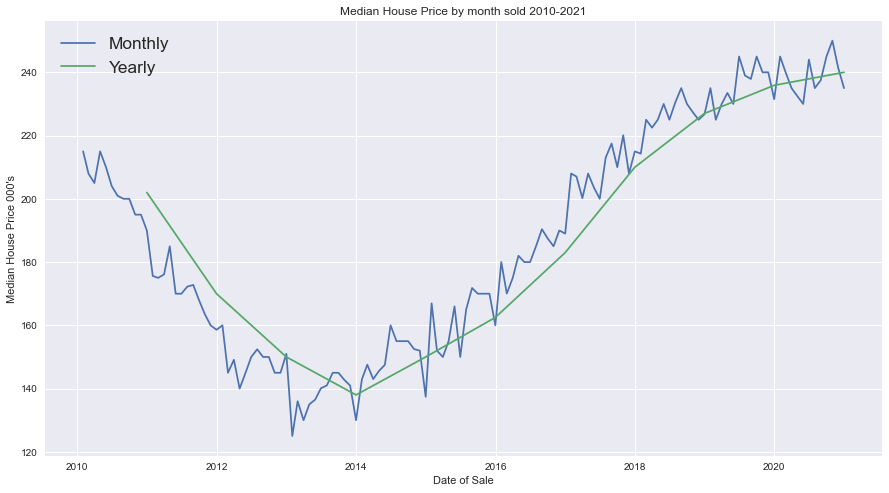

In [45]:
data["Date of Sale (dd/mm/yyyy)"] = pd.to_datetime(data["Date of Sale (dd/mm/yyyy)"])

monthData = data.groupby(pd.Grouper(key="Date of Sale (dd/mm/yyyy)", freq="M")).median()
yearData =  data.groupby(pd.Grouper(key="Date of Sale (dd/mm/yyyy)", freq="Y")).median()

plt.plot(monthData.index, monthData["Price (€)"]/1000, label="Monthly")
plt.plot(yearData.index, yearData["Price (€)"]/1000, label="Yearly")

plt.legend(fontsize="xx-large", markerscale=3)
plt.xlabel("Date of Sale")
plt.ylabel("Median House Price 000's")
plt.title("Median House Price by month sold 2010-2021")

We can clearly see from the plot above that there are significant changes, in both directions, in median price from month to month.

The year to year changes closely follow the same general pattern and direction as the monthly data. The monthly data doesn't show any clear repeated pattern which would indicate that other factors outside of the time of the year are creating these variations.

It's clear from the data above that there is potential for the prices to go up and down by significant amounts over any given time period. The factors affecting those changes, such as overall performance of the economy and housing supply and more, are outside the scope of this project and it would be impractical to try account for those in our simulation [16].

As the simulation is going to use random sampling to generate the data we will not need the extra accuracy provided by using the monthly data as a reference point. If the simulation was going to take macro-economic factors as well as housing supply and demand data into account then you may want to use the more granular monthly data to generate those projections. For our estimates the yearly data is adequate.
***

The main point we want to look at with regards to dates is how house prices change from year to year. We would like to know what the average change is year on year a the standard deviation of that distribution.

Below we use the pandas method `pct_change()` to create a Pct Change column in the yearData DataFrame. This shows us the percentage difference from year to year. We can see from the code below that the mean change over the 10 years was 2.25% and the  standard deviation was around 10.5%.

In [11]:
yearData["Pct Change"] = yearData["Price (€)"].pct_change()

print("Mean %change: ", yearData["Pct Change"].mean())
print("Std of change: ",yearData["Pct Change"].std())

yearData

Mean %change:  0.02254597992459668
Std of change:  0.10584645997990233


,Price (€),Pct Change
Date of Sale (dd/mm/yyyy),,
2010-12-31,202000.00,NaN
2011-12-31,170000.00,-0.158416
2012-12-31,150000.00,-0.117647
2013-12-31,138000.00,-0.080000
2014-12-31,150000.00,0.086957
2015-12-31,162500.00,0.083333
2016-12-31,183000.00,0.126154
2017-12-31,210000.00,0.147541
2018-12-31,227000.00,0.080952


# 2. Generate Data

Now that we have done our research on the available we can start to generate our simulated data. We start by initialising an empty pandas DataFrame `sample` with columns for each variable we want **Date**, **County**, **m_Squared** and **Price**.

As price is our dependant variable we must generate all our other variable first and then use thos values to simulate our price variable.

In [12]:
sample = pd.DataFrame(columns=["Date", "County", "m_Squared", "Price"])

## 2A. Generate County

The first variable we are going to generate is the **County** that each sale takes place. We begin by initialising a random Generator, `rng`, using numpys random module and the method `default_rng` [18]. We can call on this Generator anytime we want to access any of numpy's random methods or distributions. We use a seed value when generating random numbers so that we have repeatable data regardless of when the notebook is run.

From earlier we have the pandas series `countyCount` which has stored each County as it's index and each County's percentage of the total number of houses sold as it's values. Using the `numpy.random.choice()` function we can use this index as our sample and values as the probabilities associated with each entry. This should give us an output that resembles the distribution of counties of the real data with some random variation expected [19].

We are only generating 22,500 entries for our sample data here. This is roughly 10% of the total values we would expect over the five year period. This should be fine for the purposes of our project but could easily increased in needed.

In [13]:
rng = np.random.default_rng(12345)

sample["County"]= rng.choice(countyCount.index, p=countyCount.values, size=22500)

print(sample)

      Date   County m_Squared Price
0      NaN   Dublin       NaN   NaN
1      NaN   Dublin       NaN   NaN
2      NaN    Meath       NaN   NaN
3      NaN  Leitrim       NaN   NaN
4      NaN   Dublin       NaN   NaN
...    ...      ...       ...   ...
22495  NaN   Dublin       NaN   NaN
22496  NaN     Cork       NaN   NaN
22497  NaN  Kildare       NaN   NaN
22498  NaN    Kerry       NaN   NaN
22499  NaN   Dublin       NaN   NaN

[22500 rows x 4 columns]


## 2B. Generate Date

Next, we generate our date data. We start by creating a dat range from **1/1/2021 to 31/12/2025** using the pandas `date_range()` function. Next we create the values for the Date column of our sample. We use the numpy random choice method to select dates but this time we don't set any probability, this means any date is as likely to be selected as any other [19].

We also create a **Year** column in our sample using the pandas `DatetimeIndex()` and selecting the year value from the Date column [20]. 


In [14]:
dates = pd.date_range(start='1/1/2021', end='31/12/2025')

sample["Date"] = rng.choice(dates, size=len(sample))
sample["Year"] = pd.DatetimeIndex(sample.loc[:,"Date"]).year

print(sample)

            Date   County m_Squared Price  Year
0     2024-04-16   Dublin       NaN   NaN  2024
1     2024-09-28   Dublin       NaN   NaN  2024
2     2024-07-22    Meath       NaN   NaN  2024
3     2023-04-24  Leitrim       NaN   NaN  2023
4     2023-01-05   Dublin       NaN   NaN  2023
...          ...      ...       ...   ...   ...
22495 2022-04-19   Dublin       NaN   NaN  2022
22496 2022-08-22     Cork       NaN   NaN  2022
22497 2024-12-30  Kildare       NaN   NaN  2024
22498 2025-11-08    Kerry       NaN   NaN  2025
22499 2023-01-22   Dublin       NaN   NaN  2023

[22500 rows x 5 columns]


## 2C. Generate m<sup>2</sup>

Next we generate the square meters of each entry in the sample. Because the Price Property Register doesn't have any reliable data for house size we are going to have to use other sources and make some general assumptions about house sizes in Ireland. 

We are able to find out that the average size of a property in Ireland is 81m<sup>2</sup> so we can use that as our starting point [2]. Housing size information is better available in the UK so we make the assumption that Irish houses would follow a similar pattern. This may or may not be true but without a better source of data here we it is the best choice we have.

When simulating the data we make the assumption that house size in Ireland follows a normal distribution with the data tends to be around a central value [21]. It is entirely possible that the distribution of house size could be multimodal with peaks around different property types, eg. apartments, terrace, detached, bungalows ect, but we do not currently have the data to support this [22].

To generate the data we are going to use the numpy.random function `normal()` for generating random data in a normal distribution. The normal function takes 3 parameters **loc**, **scale** and **size** and produces an array of values centred around the value of loc with a standard deviation of the scale value [23].

To generate the data we need a central value and a standard deviation. We know that the average house size in Ireland is 81m<sup>2</sup> so we can assign that to the avgArea variable [2]. To estimate the standard deviation we can use the range rule of thumb which says that the range of values should be roughly 4 times the standard deviation [24]. While this may not be precisely accurate it provides a decent enough estimate for our purposes.

As we don't have accurate house size data for Ireland we can look at the UK data for the data range. The English housing survey 2018-19 shows the average house size by property type. The largest property type *Detached Houses* has an average size of 149m<sup>2</sup> and the smallest type *Purpose-built flats* have an average size of 58m<sup>2</sup> [25]. We can subtract 58 from 149 and divide by 4 to get a rough estimate of the standard deviation.

In [15]:
avgArea = 81

ukMax = 149
ukMin = 58

areaStd = (ukMax-ukMin)/4

print(areaStd)

22.75


Next we use our Generator object **rng** from earlier to access the numpy.random normal() method and use our values for `avgArea` and `areaStd` as our parameters to generated the data for house size and assign it to the sample data column `m_squared`. 

A few issue arise from this method of generating values that we must account for. First there may be negative values created using the normal() function. To correct this we can convert all values to absolute values by using the `numpy.absolute()` method [28].

The second issue is that we are also going to generate values that are too small to be real world house sizes. Below we print out each value in the array that is less than 20m<sup>2</sup> and we can see that there are over 80 values that fit this criteria.

In [16]:
# avg square footage ireland = 81m2

mSquare = rng.normal(loc=avgArea, scale=areaStd, size=len(sample))

mSquare = np.absolute(mSquare)

print(mSquare[mSquare<20])

[12.03900785 13.01627055 16.17340278  1.27398213 19.03379446 12.85175769
 13.90053696 12.23624266 17.18760352 15.93233888 19.27564444 13.7599476
 19.16339349 18.09036397 16.2585069  13.52639759 13.82371247 17.39945321
 16.03746635 12.99605599  3.05559955 17.19230164  2.91874889 18.4441151
 12.96123405 11.6732711   4.46918954  5.45400586 17.76523517 10.40682445
 18.73927992 16.15767756 12.43183945 14.17847145 16.597318   14.32862732
  0.37489538 14.87844276 18.31107557  8.41316458 14.85758335  8.28668405
 13.15942877  0.86319124 13.20634307 17.03253326  7.81409866 11.60180913
 11.71375532 11.415161    8.82816687 18.96790211 16.19045429 17.05608262
 16.93285018 18.29251602 14.0946728   0.07454749 17.09548023 15.80443671
  8.51932239 16.71148427 15.38467955 19.79295111 16.14944134 17.31602867
 12.37572636 12.14946514  9.57078054  1.65333321 12.47997845  9.01455814
 17.66372948 16.39580039 11.68928414 18.95202066 16.55736483 18.3574882
 15.79766401 15.72683486 17.42722522  9.59133296 11.86

To properly address the low values issue we need to know what the minimum values for house size should be. Planning guideline list the minimum size for studio apartments as 40m<sup>2</sup>, **housemin** variable [29]. We can use ths value as our minimum house size average. 

Although this is the minimum allowed size for new properties we can assume that there may be smaller homes for sale that were built under previous regulations and therefore will not neccessarily meet the 40m<sup>2</sup> requirement. 

For that reason we will use 35 as the threshold for changing any value in the array. This also allows us to again use the numpy normal function to generate the new values which will return some values less than and greater than 40.

In [17]:
housemin = 40

mSquare[mSquare<35] = rng.normal(loc=housemin, size=len(mSquare[mSquare<35]))

Now that we have removed any negative and low values we can assign the updated array to the sample column **m_Squared**.

In [18]:
sample["m_Squared"] = mSquare
sample["m_Squared"] = round(sample["m_Squared"])

print(sample.min())

Date         2021-01-01 00:00:00
County                    Carlow
m_Squared                     35
Price                       None
Year                        2021
dtype: object


## 2D. Generate Sale Price

Finally, we need to generate our price data for the sample. As price is our dependant variable, we have to take into account the other variables effect on price and attempt to factor that into our simulation. To do this we are going to create an array for each of the variables and combine them together to calculate the final price for each entry. We will originally create the arrays as the built-in list type and convert those to ndarrays so we need to perform the calculations.

### 2d 1. County Ratio

We start by creating an array that factors in the effect of the county of house price. Earlier we created the series **medianRatio** which contains each county as an index and its price ratio relative to the national median house price. We use that series to assign that ration to the array **medRatio**. For each entry in the sample depending on which county is in the county column, its corresponding ration is added to medRatio.

To generate the array we use a **list comprehension** and wrap that with the numpy function **asarray** to convert to a numpy array data type[26][27].

In [19]:
countyRatio = np.asarray([medianRatio[i] for i in sample["County"]])

In [20]:
print(countyRatio)

[1.55212435 1.55212435 1.16580311 ... 1.25300497 0.70758482 1.55212435]


### 2d 2. Annual Change

We know from our analysis earlier that there can be large changes in house price from year to year. It would not be possible to accurately predict these changes based on any factors we have looked at. We can however use the data we have to create random data that follows the same general characteristics as the real data.

We know from earlier that we have house prices over the 10 year period changed on average by `02.2546%`, both increased and decreased, with a standard deviation of `10.5846%`. We can take these results and use them as parameters in the numpy.random.normal() function we used earlier. 

We start by initialising an empty dictionary **yearPct** where we will store our years as keys and the pct change as value. Next we use a counter **pct** to keep track of our percentage. We then use a for loop to assign a percentage change to each year using the generator **rng** and the normal function with the parameters we mentioned earlier.

As we are looking at pct change we want that change to compound over time. If house prices rise significantly every year for five years we would expect the house price at year 5 to be much greater than where we started.

In [21]:
# Create random change in year avg
yearPct = {}
pct = 1

for year in range(2021, 2026):
    
    yearPct[year] = round(pct + rng.normal(loc=0.022546, scale=0.105846),4)


In [22]:
print(yearPct)

{2021: 1.0072, 2022: 1.0051, 2023: 1.1175, 2024: 1.023, 2025: 1.0515}


Finally, we will create our array **growth** which contains the % growth of the median house price for the year of sale. We use the **Year** column of the sample and assign the corresponding growth value, from the dictionary **yearPct** we created in the previous step, to the array **growth** [26][27].

In [23]:
growth = np.asarray([yearPct[i] for i in sample["Year"]])

### 2d 3. Price per m<sup>2</sup>

Next, we want to factor in the relationship between house size in m<sup>2</sup> and house price. We can divide the median house price by the median house size to find a simple average price per m<sup>2</sup>. The question then becomes which house price median to use. If we look at the median over the 10 year period we see that it is 193,000. That median however takes into account a period from 2011-2015 where the house price was significantly lower. 

Because we are using the pct change over time as a factor already it is much better to use a median value that better reflects the current or most recent sales.

In [24]:
medTen = data["Price (€)"].median()
print(medTen)

yearData

193000.0


,Price (€),Pct Change
Date of Sale (dd/mm/yyyy),,
2010-12-31,202000.00,NaN
2011-12-31,170000.00,-0.158416
2012-12-31,150000.00,-0.117647
2013-12-31,138000.00,-0.080000
2014-12-31,150000.00,0.086957
2015-12-31,162500.00,0.083333
2016-12-31,183000.00,0.126154
2017-12-31,210000.00,0.147541
2018-12-31,227000.00,0.080952


A good compromise is to use the median price for the last three years that we have data. We can see below that figure comes out as `235881.99` and we save that as the value for the variable **lastThreeMed**. We can then calculate the average per meter estimate by dividing the median price for the last 3 years by the average house size in m<sup>2</sup>.

The result of that calculation is 2912 and we store that as the value **avgPerM**.

In [25]:
lastThreeMed = yearData.iloc[-3:,0].median()

print(lastThreeMed)

avgPerM = round(lastThreeMed/avgArea)

print(avgPerM)

235881.99
2912


We can now create an array for house price by size by multiplying the house size in meters by the average price per meter **avgPerM**. Again we use a list comprehension and wrap it in np.asarray and save the result in **mSquarePrice** [26][27]. 

In [26]:
mSquarePrice = np.asarray([i*avgPerM for i in sample["m_Squared"]])

### 2d 4. Adding Statistical Noise

We have created our arrays for calculating our house prices which take into account the Date, County and size of the property sold. From this we can calculate an exact price of a property based on those 3 factors, This however is overly simplistic doesn't account for other factors that could influence price such as condition of the property, local amenities ect.

To account for this variation and to make the data more realistic, we are going to add some random noise. After we want our data to follow a similar distribution as it would before. We create an array using our **rng** Generator and the numpy normal distribution. We set the mean to 1 and standard deviation to .05 which should provide enough noise so that the data presents as more realistic.

We can see from the noise stats section below that the mean is very close to 1 and the range is roughly .4, .2 above and below 1.

In [27]:
noise = rng.normal(1, .05, size=len(sample))

In [28]:
# Noise Stats
print(noise.max())
print(noise.min())
print(noise.mean())

1.2106863864254889
0.8102035615030747
1.0000316268220535


### 2d 5. Generating Price Column

Finally, we can use the 4 arrays we have created for County, Yearly Growth, Size (m<sup>2</sup>) and for adding statistical noise. We multiply these arrays together and store the result in the variable **price**.

That variable can now be assigned to the sample column for price, rounding up and converting the result to an integer.

We now have a completed dataset of simulated data for house sales in Ireland between 2021 and 2025 which contains Dates, Counties, Sizes and Price of each property sold.


In [29]:
price = countyRatio*growth*mSquarePrice*noise

In [30]:
sample["Price"] = price
sample["Price"] = sample["Price"].round().astype(int)

In [31]:
print(sample[sample["m_Squared"] < 20])

Empty DataFrame
Columns: [Date, County, m_Squared, Price, Year]
Index: []


# 3. Analysis of Generated Data
***
Now that we have our simulated data stored in the DataFrame `sample` we can do some analysis to explore the characteristics of the data.

As we have identified **Price** as our dependant variable so we are most interested in the effect of each variable on the sale price of each entry in the data.

We can start by looking at the general statistics of the data using the pandas `describe()` function [30]. To ensure we display whole numbers we set the pandas float format to ensure the output is more readable [31]. Describe shows us the max, min and ranges of the dataset. We can also look at the general statistics for the original data to observe how they compare.

In [32]:
pd.options.display.float_format = "{:.2f}".format
sample.describe()

,m_Squared,Price,Year
count,22500.00,22500.00,22500.00
mean,81.36,262741.08,2023.01
std,21.96,125937.61,1.41
min,35.00,42611.00,2021.00
25%,66.00,163024.00,2022.00
50%,81.00,236753.50,2023.00
75%,96.00,347697.50,2024.00
max,170.00,765119.00,2025.00


In [33]:
data.describe()

,Price (€)
count,450367.00
mean,255374.22
std,804625.70
min,5030.53
25%,114500.00
50%,193000.00
75%,299556.00
max,142256576.05


As the original data did not contain any house size data we can only compare the price data of the original and the simulate sample. We can see that there are significant differences between the min and max values. We can see that mean values were relatively close. 

This would indicate that while the simulated data does share similar general characteristics with the original data we were not able to account for the extreme outliers that are present in the original data.

## 3A. House Size and Price


As the original data did not contain any house size information we can't verify if the sample resembles the original data.

We can still look at our simulation and see how our size value affects our dependant variable price. We start by plotting our data using `plt.scatter()` to create a scatter plot [32]. We assign the sample size column on the x-axis and the house price on the y-axis.

We can see here a clear positive relationship between the house size and house price as we would expect.

Text(0.5, 1.0, 'House Sales Nationwide 2021-2026')

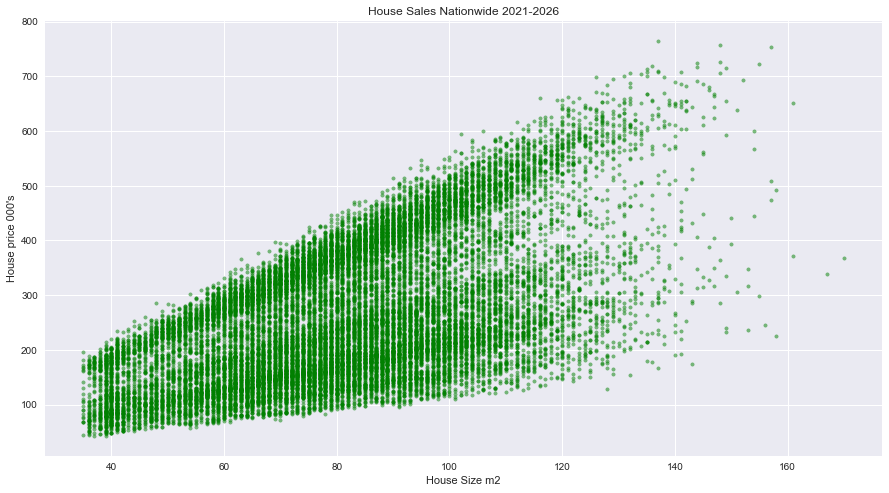

In [34]:
plt.scatter(sample["m_Squared"], sample["Price"]/1000, marker=".", color="g", alpha=0.5, label="Nationwide")
plt.xlabel("House Size m2")
plt.ylabel("House price 000's")
plt.title("House Sales Nationwide 2021-2026")

## 3B. Including County data
***

We can also look at this relationship in conjunction with another variable such as county. In the below plot we again plot a scatter plot but this time we also look at the data where the county is **Dublin**.

As we would expect from original data, the Dublin house prices are higher per m<sup>2</sup> than the rest of the country. In the plot below the Dublin values make up the upper bounds of the National data.

        Date  County  m_Squared   Price  Year
0 2024-04-16  Dublin      41.00  187809  2024
1 2024-09-28  Dublin      77.00  342672  2024
4 2023-01-05  Dublin      74.00  375965  2023
5 2023-01-25  Dublin     116.00  599954  2023
7 2025-09-09  Dublin     104.00  469836  2025


Text(0.5, 1.0, 'House Sales Dublin Vs Nationwide by House Size 2021-2026')

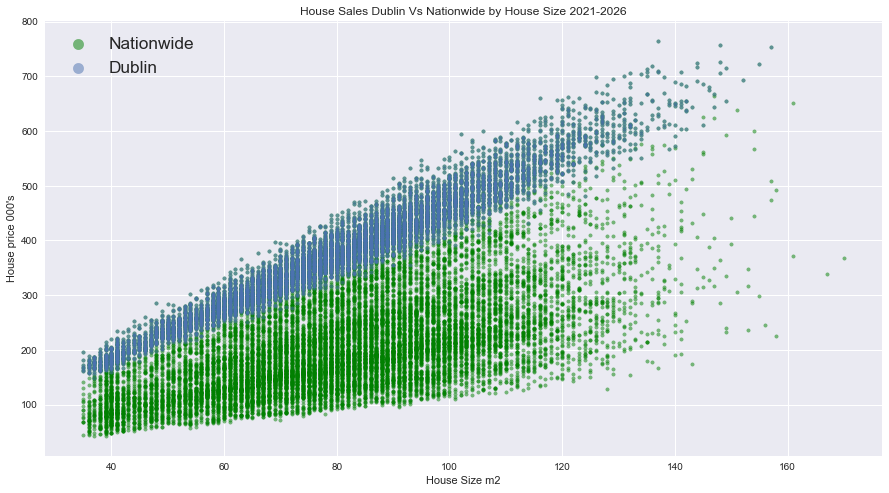

In [35]:
dublin = sample[sample["County"] == "Dublin"]
print(dublin.head())

plt.scatter(sample["m_Squared"], sample["Price"]/1000, marker=".", color="g", alpha=0.5, label="Nationwide")

plt.scatter(dublin["m_Squared"], dublin["Price"]/1000, marker=".", alpha=0.5, label="Dublin" )
plt.xlabel("House Size m2")
plt.ylabel("House price 000's")
plt.legend(loc='upper left', fontsize="xx-large", markerscale=3)
plt.title("House Sales Dublin Vs Nationwide by House Size 2021-2026")

### 3b 1. Data by Province

We might want to look at the other counties values along side Dublin. However, if we plot all 26 counties together the plot will get extremely messy and difficult to read. We can instead combine counties into smaller groups and look at the data in those groups.

The most obvious way to arrange these groups is by Province. The 4 Provinces Munster, Leinster, Connacht and Ulster provide groups of counties that are similar and geographically close to one another. Dublin itself is a part of Leinster but it makes more sense to keep Dublin as a separate group due to it's size and the properties of the house prices there.

We start by creating 4 lists, one for each province, containing the counties in that province. We create the list **leinster_exdub** which contains all counties in Leinster except Dublin. The list **ulster** only contains the 3 counties of Ulster which are in the Republic of Ireland. It would be interesting to include the other Ulster counties of Northern Ireland but that is outside the scope of this analysis.

In [36]:
munster = ["Cork", "Clare", "Kerry", "Limerick", "Tipperary", "Waterford"]
leinster_exdub = ["Carlow", "Kildare", "Kilkenny", "Laois", "Longford", "Louth", 
                  "Meath", "Offaly", "Wicklow", "Westmeath", "Wexford" ]
connacht = ["Galway", "Leitrim", "Mayo", "Roscommon", "Sligo"]
ulster = ["Cavan", "Monaghan", "Donegal"]

Next we can create new samples by the Province each entry in the data falls. We use the Pandas `isin()` method to verify which Province each entry should be assigned to create a new sample for each Province we have [33].

In [37]:
munsterSample = sample[sample["County"].isin(munster)]
leinsterSample = sample[sample["County"].isin(leinster_exdub)]
connachtSample = sample[sample["County"].isin(connacht)]
ulsterSample = sample[sample["County"].isin(ulster)]

Again we can plot the Province samples using **plt.scatter** in the same way we plotted the previous examples. We can see below that the plot is starting to get messier and harder to interpret as many of the data points overlap. Below we will look at a way to better display the general trend of the data instead of each data point.

Text(0.5, 1.0, 'House Sales by Province 2021-2026')

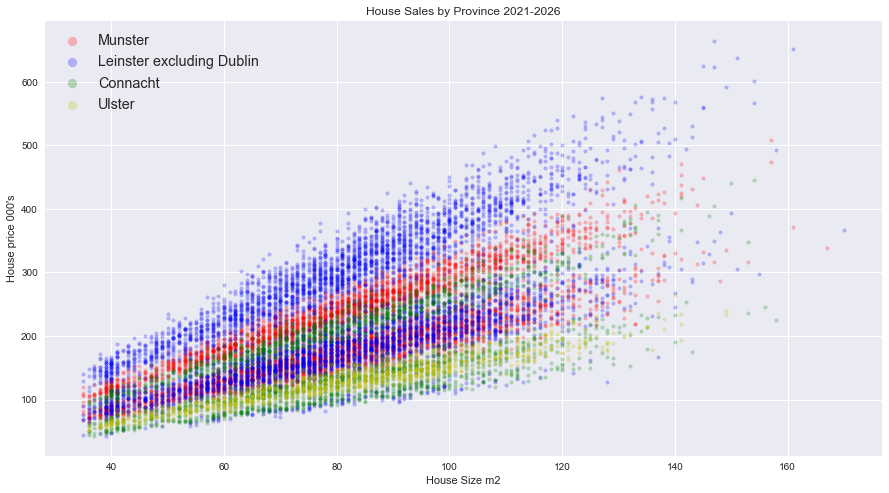

In [38]:
plt.scatter(munsterSample["m_Squared"], munsterSample["Price"]/1000, marker=".", 
            label="Munster", color="r", alpha=.25)
plt.scatter(leinsterSample["m_Squared"], leinsterSample["Price"]/1000, marker=".", 
            label="Leinster excluding Dublin", color="b", alpha=.25)
plt.scatter(connachtSample["m_Squared"], connachtSample["Price"]/1000, marker=".", 
            label="Connacht", color="g", alpha=.25)
plt.scatter(ulsterSample["m_Squared"], ulsterSample["Price"]/1000, marker=".", 
            label="Ulster", color="y", alpha=.25)

plt.xlabel("House Size m2")
plt.ylabel("House price 000's")
plt.legend(loc='upper left', fontsize="x-large", markerscale=2.5)
plt.title("House Sales by Province 2021-2026")

### 3b 2. Province Regression Analysis
As mentioned earlier, even when we have consolidated the 26 counties into 4 provinces we still have difficulty displaying all the data on one plot. The plot becomes messy and we can struggle to differentiate each Province. We can instead attempt to perform a simple regression on the data to produce a best fit line that describes each dataset.

For each region we create a function that describe a best fit line for each dataset. We use the numpy methods `polyfit` and `poly1d` to achieve this. 

polyfit takes an array x co-ordinates (m<sup>2</sup>) and an array of y co-ordinates (Price) and returns the Polynomail coefficients [34]. We then wrap these co-ordinates with poly1d which constructs the polynomial function [35]. We create 6 polynomial functions to describe our 4 Provinces as well as the Dublin data and the nationwide data.

In [39]:
func1 = np.poly1d(np.polyfit(munsterSample["m_Squared"], munsterSample["Price"], 1))

func2 = np.poly1d(np.polyfit(leinsterSample["m_Squared"], leinsterSample["Price"], 1))

func3 = np.poly1d(np.polyfit(connachtSample["m_Squared"], connachtSample["Price"], 1))

func4 = np.poly1d(np.polyfit(ulsterSample["m_Squared"], ulsterSample["Price"], 1))

func5 = np.poly1d(np.polyfit(dublin["m_Squared"], dublin["Price"], 1))

func6 = np.poly1d(np.polyfit(sample["m_Squared"], sample["Price"], 1))

Now that we have our polynomial functions we can plot our data's best fit lines. We set our x-axis values to each dataset **m_Squared** column and for our y-axis values we assign the same values but within the polynomial function for that dataset. This creates a straight line with the real m<sup>2</sup> values as the x c-ordinates and our predicted best fit values for price as the y co-ordinates.

This makes the plot much more readable, allows us to included more data within the same plot and still maintains the general characteristics and shape of the data.

Text(0.5, 1.0, 'House Sales by Province 2021-2026')

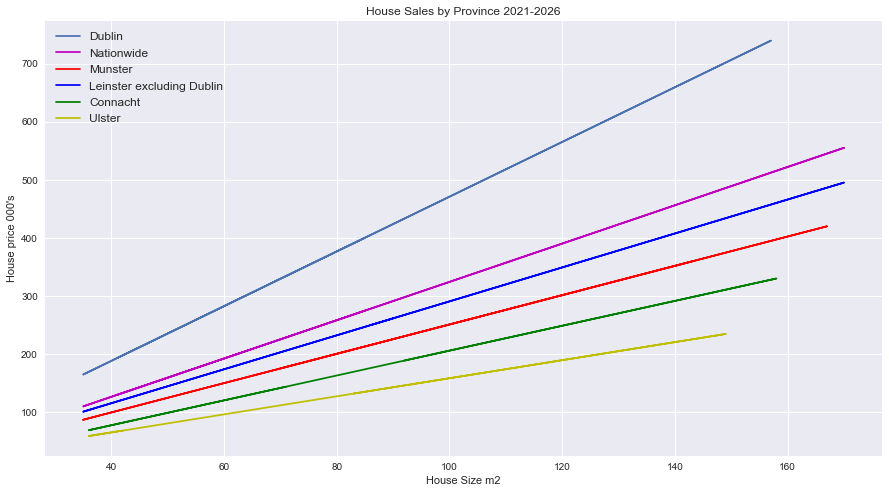

In [40]:
plt.plot(dublin["m_Squared"], func5(dublin["m_Squared"])/1000, label="Dublin")
plt.plot(sample["m_Squared"], func6(sample["m_Squared"])/1000, label="Nationwide", color="m")
plt.plot(munsterSample["m_Squared"], func1(munsterSample["m_Squared"])/1000, label="Munster", color="r")
plt.plot(leinsterSample["m_Squared"], func2(leinsterSample["m_Squared"])/1000, label="Leinster excluding Dublin", color="b")
plt.plot(connachtSample["m_Squared"], func3(connachtSample["m_Squared"])/1000, label="Connacht", color="g")
plt.plot(ulsterSample["m_Squared"], func4(ulsterSample["m_Squared"])/1000, label="Ulster", color="y")


plt.xlabel("House Size m2")
plt.ylabel("House price 000's")
plt.legend(loc='upper left', fontsize="large", markerscale=2)
plt.title("House Sales by Province 2021-2026")

We can see above that Dublin has significantly higher property values and price per m<sup>2</sup>. This is no surprise and follows what we would expect from analysis done on the original data.

The next largest price per m<sup>2</sup> is Leinster excluding Dublin. This could be explained again by the proximity to the capital where the so called  commuter belt of counties beside Dublin see higher than average house prices.

The lowest price per m<sup>2</sup> are Connacht and Ulster. This could potentially be explained by parts of these counties being more rural and having less major cities than the other provinces. As stated earlier it would be interesting to see how the 3 Ulster counties would compare to the counties or Northern Ireland.

## 3C. Group by Date
***
Now that we have looked at Size and County our last variable to analyse is the Date of Sale.

We want to look at the data on a more granular level than the year the property was sold so we want to filter by month.

Below we create 2 DataFrames **monthPrice** and **monthCount**.

monthPrice contains the median price of sales for each month in the sample dataset. monthCount contains total number of sales for each month in the sample dataset [12][14].

In [41]:
monthPrice = sample.groupby(pd.Grouper(key="Date", freq="M")).median()

monthCount= sample.groupby(pd.Grouper(key="Date", freq="M")).count()

Below we generate a line plot of both Dataframes using `plt.plot()`. The Date is plotted along the x-axis and the y-axis represents the number of sales per month and the median price for each month in 000's.

Text(0.5, 1.0, 'No. of Sale and Median Price 2021-2026')

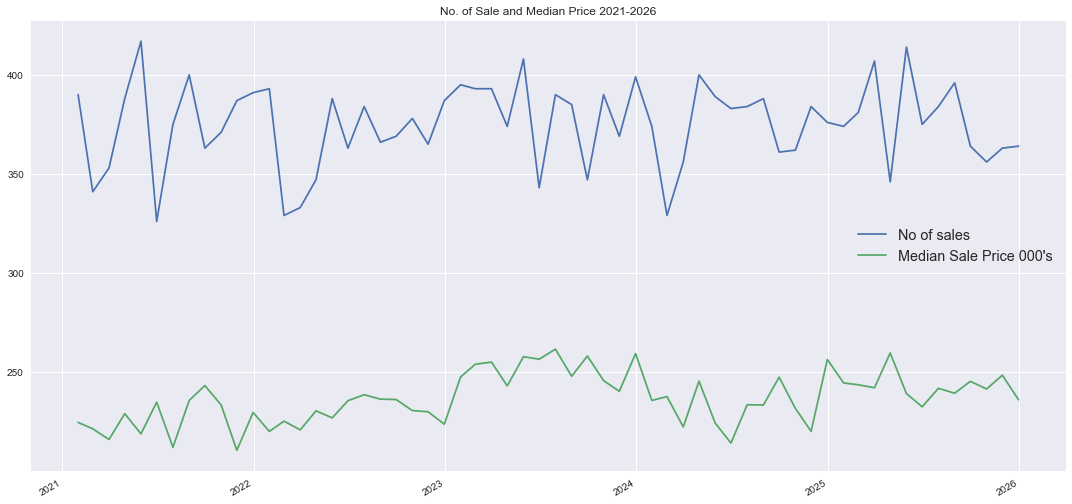

In [42]:
plt.plot(monthCount.index, monthCount["Price"], label="No of sales")
plt.plot(monthPrice.index, monthPrice["Price"]/1000, label="Median Sale Price 000's")

plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.legend(loc='right',fontsize="x-large", markerscale=2.5)
plt.title("No. of Sale and Median Price 2021-2026")

It's is difficult to draw strong conclusions about the above plot other than there are fluctuations from month to month.

It is more important to look at the sample data and how it compares to the original data. First we must create a DataFrame containing information about the number of sales per month in the original data, we name this **monthDataCount**.

Then we can plot both number of sales total and Median sale price from both datasets over the given time periods. As we have only generated roughly 10% of the total entries of the original data period we must adjust the count value for the original data to be equivalent. 

In [43]:
monthDataCount = data.groupby(pd.Grouper(key="Date of Sale (dd/mm/yyyy)", freq="M")).count()

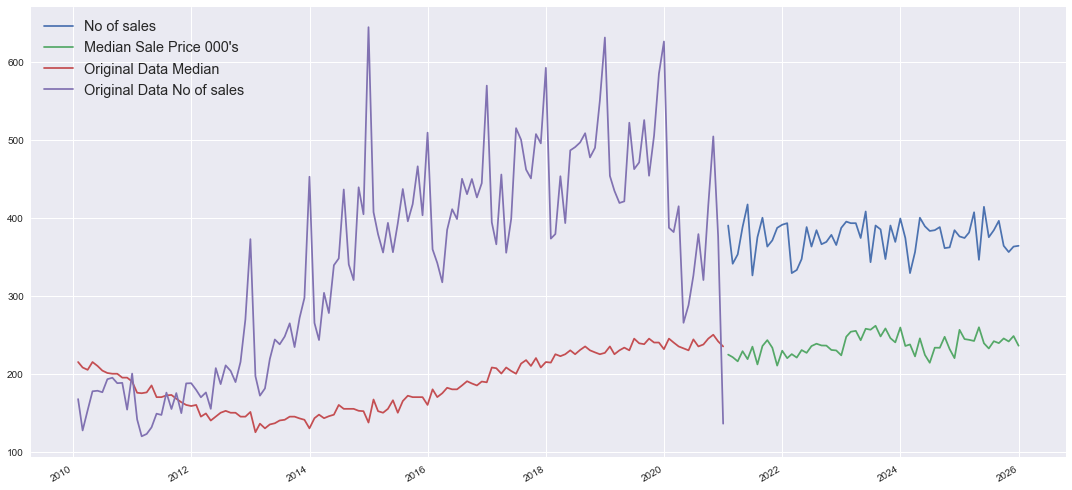

In [44]:
plt.plot(monthCount.index, monthCount["Price"], label="No of sales")
plt.plot(monthPrice.index, monthPrice["Price"]/1000, label="Median Sale Price 000's")

plt.plot(monthData.index, monthData["Price (€)"]/1000, label="Original Data Median")
plt.plot(monthDataCount.index, monthDataCount["Price (€)"]/10, label="Original Data No of sales")


plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.legend(loc='upper left',fontsize="x-large", markerscale=2.5)

We can see from the above plot that there are definitely some similarities and differences between the original data and the simulated sample data.

First we can see that the median price per month follows the same similar pattern as historical data. There is variation from month to month and year to year. There were some larger changes in the original data which occurred around 2012-2013. These changes were significantly larger than any seen in the generated sample but the data from 2016 onwards look very similar to the simulated data.

When we look at number of sales over the period we see a different picture. There seems to be much more variability in the historical data than is present in sample. There could be a number of reason for this such as the original data begins was just following the financial crisis of the late 00's which could have potentially affected the number of houses sold in that period. We also see a bit mor variability within the months of they year. This could be a good topic to investigate further to see if there are potentially cultural or societal reason why a house may be more or less likely to be sold at a specific time of the year [36].

# 4. Summary

The aim of this project was to attempt to generate simulated data using Python, that would closely model the real world phenomenon of Irish House Prices. Price was the dependent variable in our study and the independent variables we wanted to look at were date, location and house size [37]. This was split into three main sections: 

1. Investigating the current available data
2. Generating the data based on the insight gained from step 1
3. Analysing the simulated data

#### 4A. Investigating Data
House prices are a well-studied and discussed topic and there are some good data publicly available in Ireland. We used the price property register (PPR), which has a record of every house sale in Ireland since 2010, to look at trends with dates, locations and prices. One limitation of the PPR is that it doesn't have detailed house size and type information which meant we had to make certain inferences from data available in the UK which may potentially lead to general inconsistencies in the data.

#### 4B. Generating Data
Using the above process, we were able to quantify clear trends in price based on location and date of sale in the PPR. The location data could be accurately applied in the model using a ratio of each Counties likely price relative to the national median price over the same period. By looking at annual changes in median price we could code random annual price fluctuations into or model that would have similar characteristics as the real-world data we observed.

As size data was not readily available for the house sale data we had we needed to construct our own. We made the basic assumption that increased house size would lead to increased house price when all other factors we controlled for. Using data available for average house size in Ireland as our base we are able to create an average price per m<sup>2</sup>.

We also make the assumption that home sizes in Ireland would follows a similar pattern to the UK. As our nearest geographical neighbours, shared political history and cultural similarities, this makes the UK a best candidate for similar housing as opposed to any other nation. Using the available data for house size in the UK we were able to generate an approximate range of house sizes for the UK.

As well as accounting for the 3 independent variables effect on house prices, we also include some statistical noise that randomly adjusts the price of each entry. This noise is an attempt to account for the fact to no two properties will have the exact same price in the real world based on these three variable alone.

#### 4C. Analysis of Simulated Data
The final task of the project is to analyse the data we have created. We can see that the data follows the some of general characteristics of the original data we had available to us. There are some limitations however that could be visited further in the future. 

The data doesn't accurately account for the extreme outliers in the real world data. The highest and lowest values in the original data are much further from the central values than in the sample data. This may be because of the smaller sample size used or just more random variation in individual house prices.

The data of sale varies much more in the original data. This is to be expected as we didn't factor sales per month into the simulation and generated a sample which was evenly spread over the time period we looked at. Future analysis could look at whether there is a relationship between certain months of the year and number of houses sold and median price.

It is difficult to say whether the house size data accurately models real world data as we didn't have detailed data to verify our estimates against.

#### 4D. Final Thoughts
In general, we were able to generate simulated data that could easily represent a sample of real world data for future house prices, without extreme outliers. Future analysis could build off the models here to factor in macro-economic, and housing supply data and projections. This would allow us to base future price changes off other factors which influence house prices. More specific location data could be used in future projects to analyse how certain regions and sub-regions, such as cities and electoral areas, effect house prices.


# References

1. Residential Property Price Register, (2020) https://propertypriceregister.ie/
2. FinFacts-blog.com, (2018). https://www.finfacts-blog.com/2018/08/average-irish-housing-size-lowest-of.html
3. English Housing Survey, (2017) https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/725085/Floor_Space_in_English_Homes_main_report.pdf
4. ShaneLynn.ie. The Irish Property Price Register – Geocoded to Small Areas. https://www.shanelynn.ie/the-irish-property-price-register-geocoded-to-small-areas/
5. List of Irish Counties by Population. https://en.wikipedia.org/wiki/List_of_Irish_counties_by_population
6. Pandas.pydata.org. https://pandas.pydata.org/
7. Numpy.org. https://numpy.org/
8. Matplotlib.pyplot. https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html
9. Matplotlib.org. Customizing Matplotlib with style sheets and rcParams. https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html.
10. pandas.pydata,org. pandas.read_csv. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html 
11. TheBalance.com, (2020). Median vs. Average: What's the Difference?. https://www.thebalance.com/median-vs-average-what-the-difference-2682237
12. pandas.pydata.org. DataFrame.groupby. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
13. pandas.pydata.org. pandas.to_datetime. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html 
14. pandas.pydata.org. pandas.Grouper. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html
15. matplotlib.org. pyplot.plot. https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html
16. Pettinger, Tejvan (2019). Factors that affect the housing market. https://www.economicshelp.org/blog/377/housing/factors-that-affect-the-housing-market/ 
17. pandas.pydata.org. DataFrame.pct_change https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html
18. Numpy.org. Random Generator. https://numpy.org/doc/stable/reference/random/generator.html
19. Numpy.org. Random Choice. https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
20. Pandas.pydata.org. pandas.DatetimeIndex. https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
21. Wikipedia. Normal Distribution. https://en.wikipedia.org/wiki/Normal_distribution
22. Wikipedia. Multimodal Distribution. https://en.wikipedia.org/wiki/Multimodal_distribution
23. Numpy.org. numpy.random.normal. https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
24. Taylor, Courtney. (2019). Range Rule for Standard Deviation. https://www.thoughtco.com/range-rule-for-standard-deviation-3126231
25. English Housing Survey 2018-19. Size of English homes. https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/898369/Size_of_English_Homes_Fact_Sheet_EHS_2018.pdf
26. Programiz. Python List Comprehension. https://www.programiz.com/python-programming/list-comprehension
27. Numpy.org. numpy.asarray. https://numpy.org/doc/stable/reference/generated/numpy.asarray.html
28. Numpy.org. numpy.absolute. https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
29. rte.ie. New planning guidelines to allow for smaller apartment. https://www.rte.ie/news/business/2015/1222/755594-apartment-sizes/
30. pandas.pydata.org. DataFrame.describe. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
31. stackoverflow.com. How do I print entire number in Python from describe() function?. https://stackoverflow.com/questions/41328633/how-do-i-print-entire-number-in-python-from-describe-function/41328899
32. matplotlib.org. matplotlib.pyplot.scatter. https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html
33. pandas.pydata.org. DataFrame.isin. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html
34. Numpy.org. numpy.polyfit. https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
35. Numpy.org. numpy.poly1d https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html
36. mtsproperty.com. When Is the Best Time to Sell a House in Ireland? https://www.mtsproperty.com/when-is-the-best-time-to-sell-a-house-in-ireland/
37. Thomas, Lauren (2020). Independent and dependent variables https://www.scribbr.com/methodology/independent-and-dependent-variables/